In [3]:
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
import json

In [5]:
from skafossdk import Skafos

In [105]:
!pip install s3fs

Looking in indexes: https://pypi.org/simple, https://pub-pypi.metismachine.io
    100% |████████████████████████████████| 51kB 19.8MB/s 
    100% |████████████████████████████████| 5.3MB 9.0MB/s 
    100% |████████████████████████████████| 133kB 34.7MB/s 
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 122kB 36.4MB/s 
    100% |████████████████████████████████| 552kB 29.1MB/s 
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 71kB 27.1MB/s 
  Stored in directory: /home/jovyan/.cache/pip/wheels/f8/28/1e/8cd0a0ea152c17b3e75cfdc2e4015168e13ac315ecb02bb591
Successfully built s3fs
skafossdk 1.2.1 has requirement urllib3==1.23, but you'll have urllib3 1.24.1 which is incompatible.
request

In [324]:
import s3fs
fs = s3fs.S3FileSystem(anon=True)
data = []
with fs.open('s3://perfect.timing/sample-full.txt', 'rb') as f:
    for line in f:
        data.append(json.loads(line))

In [320]:
# data = []
# with open('perfect-timing/sample_data.txt') as training_data:
#     for line in training_data:
#         data.append(json.loads(line))
#         d = json.load(training_data)
#         print(d)
#         df = pd.DataFrame.from_records(d)

In [118]:
p = data[:4]

In [121]:
p

[{},
 {'XjpfnxGVvaM3CZgb-2': {'periods': [{'period': 0,
     'damage-done': 11924974,
     'damage-taken': 2314144,
     'healing': 2335781,
     'agg-damage-done': 11924974,
     'agg-damage-taken': 2314144,
     'agg-healing': 2335781},
    {'period': 1,
     'damage-done': 10057936,
     'damage-taken': 7979806,
     'healing': 6504212,
     'agg-damage-done': 21982910,
     'agg-damage-taken': 10293950,
     'agg-healing': 8839993,
     'kill': True},
    {'period': 3,
     'damage-done': 9023867,
     'damage-taken': 8287618,
     'healing': 8638781,
     'agg-damage-done': 31006777,
     'agg-damage-taken': 18581568,
     'agg-healing': 17478774},
    {'period': 6,
     'damage-done': 8694071,
     'damage-taken': 9669858,
     'healing': 8244022,
     'agg-damage-done': 39700848,
     'agg-damage-taken': 28251426,
     'agg-healing': 25722796},
    {'period': 10,
     'damage-done': 11877056,
     'damage-taken': 4551472,
     'healing': 6403636,
     'agg-damage-done': 51577904

In [ ]:
# XjpfnxGVvaM3CZgb.json
[
    {'fight_id': 2, 'prediction': .30}
]

In [422]:
training_data = []
for d in data:
    if d:
        for raid_id, v in d.items():
            if v and v['boss'] == 2263 and v['periods']:
                for ps in v['periods']:
                    period = ps['period']
                    if period == 45:
                        ps['raid_id'] = raid_id
                        ps['kill'] = v['kill']
                        training_data.append(ps)

In [423]:
len(training_data)

1622

In [424]:
# raid_ids

In [425]:
df = pd.DataFrame.from_records(training_data)

In [396]:
raid_ids = df['raid_id'].values

In [426]:
df.count()

agg-damage-done     1622
agg-damage-taken    1622
agg-healing         1622
damage-done         1622
damage-taken        1622
healing             1622
kill                1622
period              1622
raid_id             1622
dtype: int64

In [427]:
df.groupby('kill').count()

,agg-damage-done,agg-damage-taken,agg-healing,damage-done,damage-taken,healing,period,raid_id
kill,,,,,,,,
False,779,779,779,779,779,779,779,779
True,843,843,843,843,843,843,843,843


In [281]:
df.groupby('kill').head(469)

,agg-damage-done,agg-damage-taken,agg-healing,damage-done,damage-taken,healing,kill,period,raid_id
0,21982910,10293950,8839993,10057936,7979806,6504212,True,1,XjpfnxGVvaM3CZgb-2
1,27617355,9186300,8653542,11470253,7403181,6752879,True,1,m6bfMqRdDcCpW9zF-12
2,27532971,10313269,10117795,10189955,7910179,7727256,True,1,k9dZqfa83KN16YyV-1
3,23737802,9278848,8642533,10860820,6753553,6124061,True,1,RaYP2dt9kAqjWgHM-1
4,29119917,9668280,9285116,12028979,7310658,7031965,True,1,jNFbBR6VcdgtJ8pT-7
5,22096299,9225715,9196747,10193295,7573804,7498812,True,1,AwJQTBbgZXRjdcvC-9
6,23556316,8253644,8044130,9615824,6312839,6115416,True,1,pyzVTQBbXwD1ZRfk-6
7,26370687,9874901,9969971,11333944,7729667,7883181,True,1,AdNtcpz4bJ1FG973-4
8,23650598,8897934,8611875,11717777,6411200,6325896,False,1,TXJ9mGdLf4RPZH6k-3
9,24609753,12176917,12177033,11845286,9509322,9536451,True,1,TXJ9mGdLf4RPZH6k-4


In [428]:
df2 = df.groupby('kill').head(779)

In [429]:
df2.groupby('kill').count()

,agg-damage-done,agg-damage-taken,agg-healing,damage-done,damage-taken,healing,period,raid_id
kill,,,,,,,,
False,779,779,779,779,779,779,779,779
True,779,779,779,779,779,779,779,779


In [430]:
x_train, x_test, y_train, y_test = train_test_split(df2.drop(columns=['kill', 'raid_id']), df2.kill, stratify=df2.kill)


In [405]:
# x_train

In [406]:
# y_train

In [407]:
# x_test

In [408]:
# y_test

## Random Forest for feature selection

In [409]:
# !pip install matplotlib

In [431]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

In [432]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [433]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [434]:
# x_train

Feature ranking:
0. agg-damage-done
1. agg-damage-taken
2. agg-healing
3. damage-done
4. damage-taken
5. healing
 6. period
1. feature 0 (0.327840)
2. feature 3 (0.180502)
3. feature 5 (0.147087)
4. feature 2 (0.129707)
5. feature 4 (0.114460)
6. feature 1 (0.100404)
7. feature 6 (0.000000)


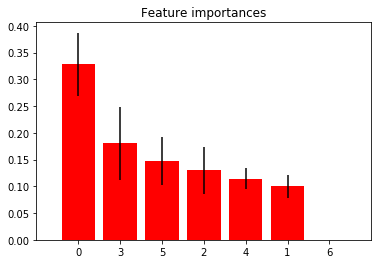

In [435]:
# Print the feature ranking
print("Feature ranking:")
print("""0. agg-damage-done\n1. agg-damage-taken\n2. agg-healing\n3. damage-done\n4. damage-taken\n5. healing\n 6. period""")
for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

## Correlation analysis, features correlated with one another, some can be discarded. Correlation with outcome will be preferred

## Linear Regression model

In [436]:
x_test

,agg-damage-done,agg-damage-taken,agg-healing,damage-done,damage-taken,healing,period
345,77728276,63753472,61463400,6212745,4537078,4414148,45
738,77318572,78904150,78149426,9621191,7593059,7890870,45
84,97440869,72643549,70393983,8746456,6993401,4625755,45
392,82754345,69095301,63226443,6653792,8322275,3800746,45
362,93834298,75947721,75349278,9443603,8769243,8506225,45
1192,82173431,73680913,67026013,4532414,9785332,4753144,45
261,94036753,76895960,73198387,6672922,6602680,4091576,45
1022,91174228,72594926,68092203,9536727,10490499,7218014,45
1057,88011860,71266868,70926159,9842023,7159248,6936332,45
874,91426556,70239196,69502457,9281607,6814395,7247869,45


In [437]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [438]:
# predictions

In [439]:
predictions = lr.predict(x_test)
#for x in predictions:
#    print(x)
pred_df = pd.DataFrame(predictions, y_test)
pred_df
# y_scores = [p[1] for p in lr.predict_proba(x_test)]
# y_scores

,0
kill,
False,False
True,False
True,True
False,False
True,True
False,False
True,False
True,False
False,True


In [440]:
lr.score(x_test, y_test)

0.8102564102564103

## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier